In [1]:
''' 
Result Visualization
Author: Yitian Shao
Created on 2022.01.20
Merge adpated on 2022.01.28
Updated on 2022.03.04 for new measurement
'''
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', size=18, family='Verdana') # 'Tahoma', 'DejaVu Sans', 'Verdana'
plt.rc('axes', edgecolor='0.5', linewidth=0.75)
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

In [2]:
''' General functions '''
def selectConditions(dFrame, condiList):
    #ind = np.zeros(dFrame['CondiName'].shape, dtype=bool)
    indList = []
    for aCondi in condiList:
        #ind = ind | (dFrame['CondiName'] == aCondi)
        indList.extend(dFrame[dFrame['CondiName'] == aCondi].index)
        
    return indList

In [3]:
''' Load data '''
condiTable = pd.read_csv("./data./ConditionTable.csv") # Table of measurement conditions

measureData = pd.read_csv("./data./Measurements.csv") # Data from physical measurements

measureData.tail()

,Unnamed: 0,CondiName,AvgPressure_kPa,RiseTime_sec,MaxPressure_kPa,P0_kPa,SigFreq
193,193,MLSi20HV7kV1Hz,5.901818,0.1765,9.196100,2.185958,1.0
194,194,MLSi20HV7kV1Hz,5.866349,0.1740,9.115911,2.221241,1.0
195,195,MLSi20HV7kV1Hz,5.785036,0.1770,8.947513,2.104165,1.0
196,196,MLSi20HV7kV1Hz,5.705002,0.1735,8.807984,2.141052,1.0
197,197,MLSi20HV7kV1Hz,5.640533,0.1755,9.066193,2.168317,1.0


In [ ]:
# simData = pd.read_csv("./data./temp_result.csv") # Data from model simulation

# ''' Average and median rising time of each condition '''

# simData['deltaT'] = np.nan
# simData['deltaTm'] = np.nan

# trialsData = []
# trialMax = []

# for aCondi in condiTable['CondiName']:
#     allTrials = measureData[measureData['CondiName'] == aCondi]
#     avgDeltaT = np.mean(allTrials['RiseTime_sec'])
#     medDeltaT = np.median(allTrials['RiseTime_sec'])
#     print("%s - average deltaT = %.3f sec, median deltaT = %.3f sec" % (aCondi, avgDeltaT, medDeltaT))
    
#     simData.loc[simData['CondiName'] == aCondi,'deltaT'] = avgDeltaT
# #     simData.loc[simData['CondiName'] == aCondi,'deltaTm'] = medDeltaT

#     trialsData.append(allTrials['AvgPressure_kPa'])
#     trialMax.append(allTrials['AvgPressure_kPa'].max())
    
# simData['pLossFull'] = simData['lossFactor']*simData['dVFull_m3']/simData['deltaT']
# simData['pLoss1Expan'] = simData['lossFactor']*simData['dV1Expan_m3']/simData['deltaT']

# # simData['pLoss1ExpanM'] = simData['lossFactor']*simData['dV1Expan_m3']/simData['deltaTm']



In [4]:
''' Pressure loss from realtime flow rate estimation '''

simData = pd.read_csv("./data./temp_result.csv") # Data from model simulation
# simData['pLoss1Expan_kPa'] = np.nan

for aCondi in condiTable['CondiName']:
    allTrials = measureData[measureData['CondiName'] == aCondi]
    simData.loc[simData['CondiName'] == aCondi,'pLoss1Expan_kPa'] = np.mean(allTrials['P1ExpanLoss_kPa'])


fig1, ax1 = plt.subplots()
fig1.set_size_inches(18,6)
fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Measurement (Red)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

ax1.plot(simData['CondiName'], simData['P1Expan_Pa']*1e-3, '-', color='k')
ax1.plot(simData['CondiName'], simData['P1Expan_Pa']*1e-3+simData['pLoss1Expan_kPa'], 's--', color='tab:orange')

ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
ax1.set_ylabel('Pressure (kPa)', color='tab:orange')

KeyError: 'P1ExpanLoss_kPa'

3    BOPP16ShiftedU7kV
4    L0Ws16ShiftedU9kV
6              Mylar16
Name: CondiName, dtype: object
8            BOPP16
5     L0Ws16NoShift
7    Mylar16NoShift
Name: CondiName, dtype: object


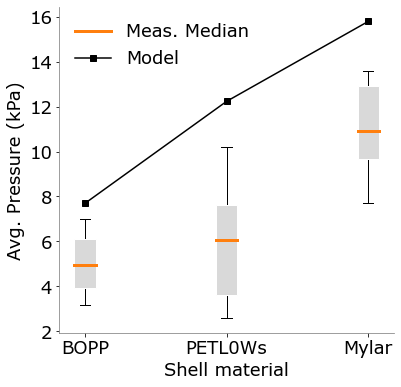

In [6]:
''' Compare material '''
compList = ['BOPP16ShiftedU7kV','L0Ws16ShiftedU9kV','Mylar16'] # List of conditions to be compared
compList2 = ['BOPP16','L0Ws16NoShift','Mylar16NoShift'] # List of conditions (Dash No shift) to be compared

indList = selectConditions(simData, compList)
indList2 = selectConditions(simData, compList2)
print(simData.loc[indList,'CondiName']); print(simData.loc[indList2,'CondiName'])

# sim1 = np.array(simData.loc[indList,'P1Expan_Pa'] - simData.loc[indList,'pLoss1Expan'])*1e-3 # constant estimation
# sim2 = np.array(simData.loc[indList2,'P1Expan_Pa'] - simData.loc[indList2,'pLoss1Expan'])*1e-3 # constant estimation

sim1 = np.array(simData.loc[indList,'P1Expan_Pa']*1e-3 + simData.loc[indList,'pLoss1Expan_kPa']) # Realtime estimation
sim2 = np.array(simData.loc[indList2,'P1Expan_Pa']*1e-3 + simData.loc[indList2,'pLoss1Expan_kPa']) # Realtime estimation

simAvg = 0.5 * (sim1 + sim2)

trialsData = []
for aPair in zip(compList, compList2): # Ordered based on the list
    mergedCondi = measureData.loc[measureData['CondiName'] == aPair[0], 'AvgPressure_kPa'].tolist()
    mergedCondi.extend(measureData.loc[measureData['CondiName'] == aPair[1], 'AvgPressure_kPa'].tolist())
    trialsData.append(mergedCondi)    

''' Generate plot '''    
boxprops = dict(linestyle='-', linewidth=1, color='w', facecolor='0.85')
medianprops = dict(linestyle='-', linewidth=3, color='tab:orange')
    
fig1, ax1 = plt.subplots()
fig1.set_size_inches(6,6)
#fig1.suptitle("Avg. Pressure provide by different shell materials")
ax1.set_xlabel('Shell material')
ax1.set_xticklabels(compList, rotation=0)

x = range(len(compList))

pH = ax1.plot(x, simAvg, 's-', color='k')

pH2 = ax1.boxplot(trialsData, positions=x, widths = 0.15, manage_ticks = False, medianprops=medianprops, 
                 patch_artist=True, boxprops=boxprops, notch = False, showfliers = True)

ax1.set_ylabel('Avg. Pressure (kPa)', color='k')
ax1.tick_params(axis='y', labelcolor='k')

plt.xticks(x, condiTable.loc[indList, 'Shell']);

ax1.legend(handles=[pH2['medians'][0],pH[0]],labels=['Meas. Median','Model'], frameon=False);

plt.savefig("comp_shell_material.pdf", bbox_inches='tight')

26     L0WsSi6-16Trek9kVHVTop
27    L0WsSi6-16Trek10kVHVTop
Name: CondiName, dtype: object


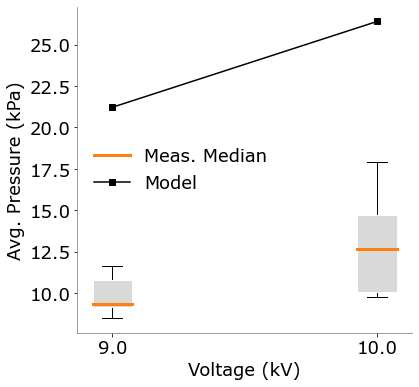

In [15]:
''' Compare voltage (L0Ws - Temporary) '''
# compList = ['L0WsSi5-20Trek8kV','L0WsSi5-20Trek9kV','L0WsSi5-20Trek10kV'] # List of conditions to be compared
compList = ['L0WsSi6-16Trek9kVHVTop','L0WsSi6-16Trek10kVHVTop'] # List of conditions to be compared

indList = selectConditions(simData, compList)
print(simData.loc[indList,'CondiName']);

sim1 = np.array(simData.loc[indList,'P1Expan_Pa']*1e-3 + simData.loc[indList,'pLoss1Expan_kPa']) # Realtime estimation

trialsData = []
for aCondi in (compList): # Ordered based on the list
    aTrial = measureData.loc[measureData['CondiName'] == aCondi, 'AvgPressure_kPa'].tolist()
    trialsData.append(aTrial)   
    
''' Generate plot '''    
boxprops = dict(linestyle='-', linewidth=1, color='w', facecolor='0.85')
medianprops = dict(linestyle='-', linewidth=3, color='tab:orange')
    
fig1, ax1 = plt.subplots()
fig1.set_size_inches(6,6)
ax1.set_xlabel('Voltage (kV)')
ax1.set_xticklabels(compList, rotation=0)

x = range(len(compList))

pH = ax1.plot(x, sim1, 's-', color='k')

pH2 = ax1.boxplot(trialsData, positions=x, widths = 0.15, manage_ticks = False, medianprops=medianprops, 
                 patch_artist=True, boxprops=boxprops, notch = False, showfliers = True)

ax1.set_ylabel('Avg. Pressure (kPa)', color='k')
ax1.tick_params(axis='y', labelcolor='k')

plt.xticks(x, 0.001 * condiTable.loc[indList, 'Voltage_V']);

ax1.legend(handles=[pH2['medians'][0],pH[0]],labels=['Meas. Median','Model'], frameon=False);

# plt.savefig("comp_voltage.pdf", bbox_inches='tight')

In [ ]:
''' Obsoleted Analysis '''
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(16,6)
# fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Measurement (Red)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# ax1.plot(simData['CondiName'], simData['P1Expan_Pa']*1e-3, '--', color='k')
# ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
# # ax1.plot(simData['CondiName'], (simData['PFull_Pa'] - simData['pLossFull'])*1e-3, '--', color='b')
# #ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1ExpanM'])*1e-3, color='b')
# ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# # ax1.plot(measureData['CondiName'], measureData['MaxPressure_kPa'], '.',color='tab:blue')
# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# # ax1.set_ylim([0, 22.5]);

''' Boxplot of trials (Obsoleted)'''
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(16,6)
# fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Measurement (Red)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# x = range(len(simData))

# ax1.plot(x, trialMax, '--', color='tab:grey')

# ax1.plot(x, (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
# box1 = ax1.boxplot(trialsData, positions=x, widths = 0.3, manage_ticks = False, medianprops=dict(color='red'))

# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# plt.xticks(x, simData['CondiName'])

# ax1.set_ylim([0, 22.5]);

''' Obsoleted Analysis '''
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(16,6)
# fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Peak Pressure of Measurement (blue)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
# ax1.plot(measureData['CondiName'], measureData['MaxPressure_kPa'], '.',color='tab:blue')
# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax1.set_ylim([0, 25]);

''' Obsoleted Analysis '''
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(16,8)
# fig1.suptitle("Pressure (Orange) vs. Driven Voltage (Blue)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# ax1.plot(simData['CondiName'], simData['PFull_Pa']*1e-3, color='tab:orange')
# ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax2 = ax1.twinx() 
# ax2.plot(condiTable['CondiName'], condiTable['Voltage_V']*1e-3, '-', color='tab:blue')
# ax2.set_ylabel('Voltage (kV)', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# fig1.tight_layout() 

# ax2.set_ylim([5, 10]);

''' Obsoleted Analysis '''
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(16,10)
# fig1.suptitle("Pressure (Orange) vs. Material of Shell (Blue x) and Fluid (Black squre)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# ax1.plot(simData['CondiName'], simData['PFull_Pa']*1e-3, color='tab:orange')
# ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax2 = ax1.twinx() 
# ax2.plot(condiTable['CondiName'], condiTable['Shell'], 'x',color='tab:blue')
# ax2.plot(condiTable['CondiName'], condiTable['Fluid'], 's',color='k')
# ax2.set_ylabel('Material', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# fig1.tight_layout() 

# ax2.set_ylim([-4, 5]);

''' Obsoleted Analysis '''
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(10,6)
# fig1.suptitle("Pressure (Orange) vs. Layout (Blue)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# ax1.plot(simData['CondiName'], simData['PFull']*1e-3, color='tab:orange')
# ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax2 = ax1.twinx() 
# ax2.plot(condiTable['CondiName'], condiTable['Layout'], 'x',color='tab:blue')
# ax2.set_ylabel('Layout', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# fig1.tight_layout() 

# ax2.set_ylim([-6, 6]);

''' Obsoleted Analysis '''
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(10,6)
# fig1.suptitle("Pressure (Orange) vs. Row Space (Blue x) and Dash length (Black square)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# ax1.plot(simData['CondiName'], simData['PFull']*1e-3, color='tab:orange')
# ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax2 = ax1.twinx() 
# ax2.plot(condiTable['CondiName'], condiTable['DashSpace_mm'], 'x',color='tab:blue')
# ax2.plot(condiTable['CondiName'], condiTable['DashLength_mm'], 's',color='k')
# ax2.set_ylabel('(mm)', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# fig1.tight_layout() 

# ax2.set_ylim([0, 21]);